### Importing Spam dataset csv file using read csv function and as the file is seperated witrh a tab(space) hence we are using seperator as "\t", and as the heading by deafult appear as 0 and 1 we are replacing it with column names as "lable" and "message"

In [261]:
import pandas as pd
sh_df = pd.read_csv('spam.csv', sep='\t', names=["label", "message"])

### Checking the dataframe we find that there are 5572 rows and 2 columns

In [262]:
sh_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis 

### The data set looks like this with 2 inputs: lables and messages

In [263]:
sh_df.head(8)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


### Describe function helps in giving the information about the data set and its properties. We can see that the total count of messages is 5572 and there are 2 unique columns. There are more HAM messages than spam henece we can see that top is reffered to HAM. 

In [264]:
sh_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### To understand how many spam and ham messages are there we have used the function valuecount(). We can clearly see that Ham messages are 4825 and spam messages are 747  

In [265]:
sh_df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### We can clearly see the count distribtion using visualization where HAM > SPAM

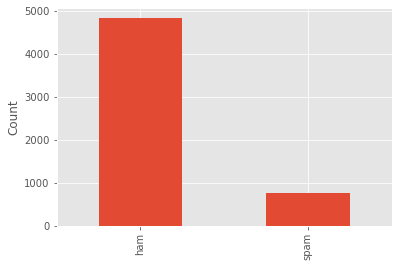

In [266]:
import matplotlib.pyplot as plt
sh_df["label"].value_counts().plot(kind='bar')
plt.style.use('ggplot')
plt.ylabel('Count')
plt.show()

### Now we have wanted to know what is the length of the messages so that analysis would become easy hence we have and extra column to see the length and we can also find out the maximum length of the message by looking at the description. We can clearly see that the maximum length of a amessage is 910 and the minimum is 2.

In [267]:
sh_df['length']= sh_df['message']. apply(len)
sh_df.head(10)
sh_df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


### Checking the message that has max leghth so for that we have extracted the message.

In [268]:
sh_df[sh_df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Checking the message that has min leghth so for that we have extracted the message

In [269]:
sh_df[sh_df['length']==2]['message'].iloc[0]

'Ok'

### To understand the patterna nd the difference betewwen the ham and spam length we have used visualization where we observed that the message ios likely to be a spam if the length of the message is more.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001360051B8B0>,
      dtype=object)

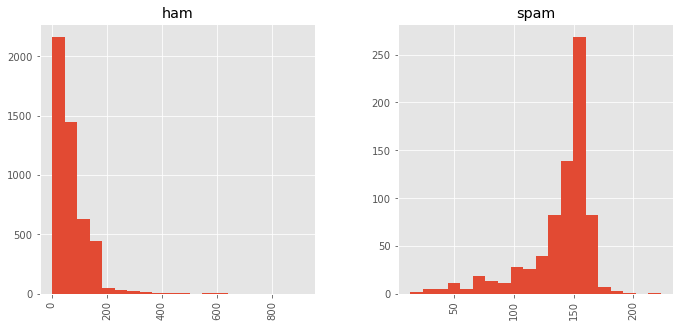

In [270]:
sh_df.hist(column='length', by='label', bins=20,figsize=(11,5))

## DATA PRE-PROCESSING

### For Data Pre-Processing we have removed unwanted data that includes stop words removal, and stemming the data with tokenization. first we have used regular expressions and then made all thge messages in lower case for our convinience and accuracy purpose, then we have have split the messages into words and then remove the stop wprds and then use join function in order to make it a message again and return processsed messages back to the data frame. Hence created a function for the same.

### Checking the stopwords from the libraray

In [271]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
ps = PorterStemmer()
def cleanText(message):
    message = re.sub('[^a-zA-Z]', ' ', message)
    message = message.lower()
    message = message.split()
    words = [ss.stem(word) for word in message if word not in stop]
    return " ".join(words)

# Calling the function 
sh_df["message"] = sh_df["message"].apply(cleanText)
sh_df.head(n = 5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61


In [272]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Now to understand which words and messages are spam or ham we use word tokemnization by dividing the the data into 2 lists one for spam messages and other for ham messages so that we can sepearately do analysis on them.

In [273]:
spam_msg = sh_df[sh_df["label"] == "spam"]["message"]
ham_msg = sh_df[sh_df["label"] == "ham"]["message"]

In [274]:
## Reading 5 of the spam messages
spam_msg[0:5]

2     free entri wkli comp win fa cup final tkts st ...
5     freemsg hey darl week word back like fun still...
8     winner valu network custom select receivea pri...
9     mobil month u r entitl updat latest colour mob...
11    six chanc win cash pound txt csh send cost p d...
Name: message, dtype: object

In [275]:
## Reading 5 of the Ham messages
ham_msg[0:5]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
6        even brother like speak treat like aid patent
Name: message, dtype: object

### Now After seperating the ham and spam messages as said earlier we wanted to understand the SPAM and HAM words and which words have frequently repeated. We found out the frequency distributiobn of all these words with graph to understand better.

In [276]:
## Globally declaring spam_words and ham_words as we have to use them in the future

ham_words = []
spam_words = []

from nltk.tokenize import word_tokenize

def HamWords (ham_msg):
    global ham_words
    words= [ word for word in word_tokenize(ham_msg)]
    ham_words += words


def SpamWords (spam_msg):
    global spam_words
    words= [ word for word in word_tokenize(spam_msg)]
    spam_words += words


#Calling the function for both spam messages and ham messages

ham_msg.apply(HamWords)
spam_msg.apply(SpamWords)

2       None
5       None
8       None
9       None
11      None
        ... 
5537    None
5540    None
5547    None
5566    None
5567    None
Name: message, Length: 747, dtype: object

### Now checking the ham and spam words seperately. We found out the frequency distributiobn of all these words with graph to understand better.

In [277]:
print(ham_words)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', 'spell', 'name', 'yes', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', 'month', 'ha', 'ha', 'joke', 'pay', 'firs

In [278]:
print(spam_words)

['free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour', 'mobil', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', 'six', 'chanc', 'win', 'cash', 'pound', 'txt', 'csh', 'send', 'cost', 'p', 'day', 'day', 'tsandc', 'appli', 'repli', 'hl', 'info', 'urgent', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', 'c', 'www', 'dbuk', 'net', 'lccltd', 'pobox', 'ldnw', 'rw', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click', 'http', 'wap', 'xxxmobilemovieclub', 'com', 'n', 'qjkgighjjgcbl', 'en

In [279]:
from collections import Counter
Counter = Counter(ham_words)
most_occur = Counter.most_common(10) 
  
print(most_occur)

[('u', 1042), ('go', 425), ('get', 368), ('gt', 318), ('lt', 316), ('call', 300), ('come', 300), ('ok', 288), ('love', 258), ('day', 251)]


HAM WORDS FREQUENCY


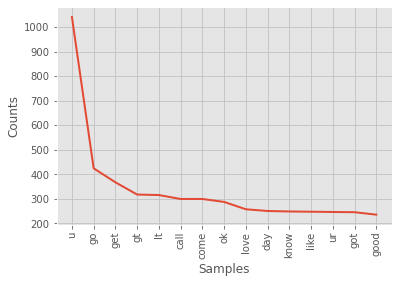

In [334]:
freq_dist = nltk.FreqDist(ham_words)
k = 15
print ("HAM WORDS FREQUENCY")
freq_dist.plot(k)


In [281]:
from collections import Counter
Counter = Counter(spam_words)
most_occur = Counter.most_common(15) 
print(most_occur)

[('call', 395), ('free', 228), ('u', 186), ('p', 180), ('txt', 170), ('text', 146), ('ur', 144), ('mobil', 142), ('stop', 128), ('claim', 115), ('repli', 113), ('www', 98), ('prize', 97), ('week', 93), ('get', 90)]


SPAM WORDS FREQUENCY


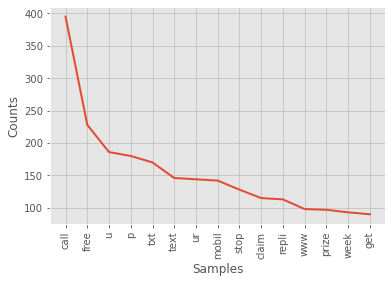

In [335]:
freq_dist = nltk.FreqDist(spam_words)
k = 15
print ("SPAM WORDS FREQUENCY")
freq_dist.plot(k)

## To make it more clear and visual we are creating a wrod cloud that shows the most frquent words in both ham and spam messages.But we concentrated only on spam so we are only visualizing spam word cloud

Spam Words


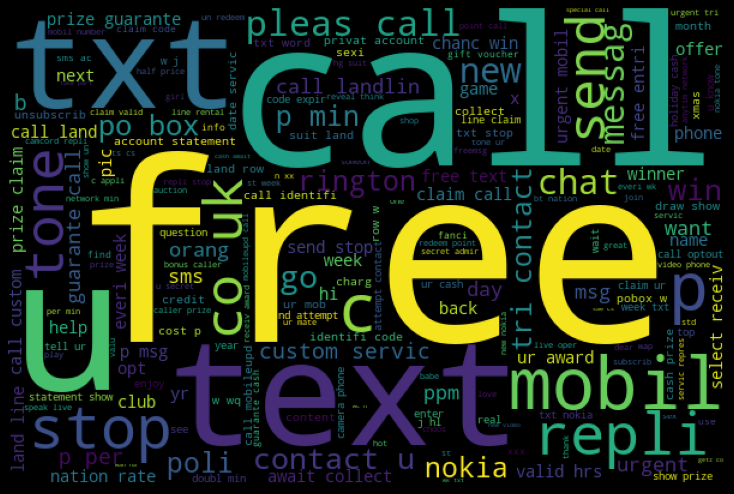

In [283]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
title="Spam Words"
print(title)
plt.tight_layout(pad=0)
plt.show()

### We need to First convert the lables column into numbers as the system doesnt understand words hence we are writing a function to work outr the same.

In [284]:
def LabelChange(m):
    if m == "spam":
        return 1
    else:
        return 0
        
sh_df["label"] = sh_df["label"].apply(LabelChange)

In [285]:
## Hence we can see here that the label column has been converted to 0 and 1 where spam = 0 and ham = 1
sh_df

,label,message,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkts st ...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,nd time tri contact u u pound prize claim easi...,160
5568,0,b go esplanad fr home,36
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


### Now if we see the messages they are in text format and the system doesnt understand the text format, hence we have to use vectorizaion that actually converts words to numbers. hence we are trying with 2 vectorizations one is TF-IDF vectorizer and other one is Counter Vectorizer 

# TF-IDF vectorizer

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode")
x = vec.fit_transform(sh_df["message"])
print(x.shape)

(5572, 6292)


In [287]:
x= vec.fit(sh_df["message"])
print(x.vocabulary_)
print(x.get_feature_names())

{'go': 2167, 'jurong': 2821, 'point': 4089, 'crazi': 1168, 'avail': 378, 'bugi': 736, 'great': 2241, 'world': 6130, 'la': 2926, 'buffet': 734, 'cine': 965, 'got': 2204, 'amor': 189, 'wat': 5952, 'ok': 3758, 'lar': 2954, 'joke': 2788, 'wif': 6050, 'oni': 3783, 'free': 2002, 'entri': 1671, 'wkli': 6095, 'comp': 1058, 'win': 6061, 'fa': 1787, 'cup': 1219, 'final': 1886, 'tkts': 5528, 'st': 5093, 'may': 3270, 'text': 5411, 'receiv': 4396, 'question': 4315, 'std': 5121, 'txt': 5689, 'rate': 4358, 'appli': 261, 'dun': 1549, 'say': 4643, 'earli': 1566, 'hor': 2470, 'alreadi': 162, 'nah': 3531, 'think': 5459, 'goe': 2171, 'usf': 5806, 'live': 3065, 'around': 301, 'though': 5476, 'freemsg': 2008, 'hey': 2402, 'darl': 1266, 'week': 5987, 'word': 6124, 'back': 413, 'like': 3037, 'fun': 2055, 'still': 5142, 'tb': 5356, 'xxx': 6197, 'chgs': 923, 'send': 4712, 'rcv': 4369, 'even': 1720, 'brother': 709, 'speak': 5027, 'treat': 5632, 'aid': 117, 'patent': 3933, 'per': 3968, 'request': 4466, 'mell': 33

In [288]:
X = vec.fit_transform(sh_df["message"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [289]:
df = pd.DataFrame(X,columns=vec.get_feature_names())
df['len']=sh_df['length']
y=sh_df['label']
df

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,len
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125


## Naive bayes classifier - TF-IDF vectorizer

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

from sklearn.metrics import accuracy_score,fbeta_score,classification_report
print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test,y_pred)))

Accuracy score: 0.875
Precision score: 1.0
Recall score: 0.05429864253393665
F1 score: 0.10300429184549356


In [291]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1451
           1       1.00      0.05      0.10       221

    accuracy                           0.88      1672
   macro avg       0.94      0.53      0.52      1672
weighted avg       0.89      0.88      0.82      1672



## Random Forest Classifier - TF-IDF vectorizer

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=15,criterion='entropy')
classifier1.fit(X_train,y_train)
predRF=classifier1.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,predRF)))
print('Precision score: {}'.format(precision_score(y_test, predRF)))
print('Recall score: {}'.format(recall_score(y_test, predRF)))
print('F1 score: {}'.format(f1_score(y_test,predRF)))


Accuracy score: 0.9802631578947368
Precision score: 1.0
Recall score: 0.8506787330316742
F1 score: 0.9193154034229828


In [293]:
print (classification_report(y_test,predRF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       1.00      0.85      0.92       221

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## SVM Classifier - TF-IDF vectorizer

In [294]:
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)

SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)
predSVM=SVM.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,predSVM)))
print('Precision score: {}'.format(precision_score(y_test, predSVM)))
print('Recall score: {}'.format(recall_score(y_test, predSVM)))
print('F1 score: {}'.format(f1_score(y_test,predSVM)))

Accuracy score: 0.9826555023923444
Precision score: 0.9752475247524752
Recall score: 0.8914027149321267
F1 score: 0.9314420803782507


In [295]:
print (classification_report(y_test,predSVM))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.98      0.89      0.93       221

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Logistic Regression - TF-IDF vectorizer

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,predlr)))
print('Precision score: {}'.format(precision_score(y_test, predlr)))
print('Recall score: {}'.format(recall_score(y_test, predlr)))
print('F1 score: {}'.format(f1_score(y_test,predlr)))

Accuracy score: 0.9659090909090909
Precision score: 0.9606741573033708
Recall score: 0.7737556561085973
F1 score: 0.8571428571428572


E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [297]:
print (classification_report(y_test,predlr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1451
           1       0.96      0.77      0.86       221

    accuracy                           0.97      1672
   macro avg       0.96      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



## COUNTER Vectorizer

In [298]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(sh_df["message"])
print (X.shape)

(5572, 6292)


In [332]:
X=cv.fit(sh_df["message"])
X.vocabulary_
X.get_feature_names()

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accord',
 'accordin',
 'account',
 'accumul',
 'ach',
 'achan',
 'achiev',
 'acid',
 'acknowledg',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'ae',
 'aeronaut',
 'aeroplan',
 'afew',
 'affair',
 'affect',
 'affection',
 'affidavit',
 'afford',
 'afghanistan',


In [300]:
X = cv.fit_transform(sh_df["message"]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [301]:
df = pd.DataFrame(X,columns=cv.get_feature_names())
df['len']=sh_df['length']
y=sh_df['label']
df

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,len
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,111
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,160
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,57
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125


## Naive bayes classifier - COUNTER Vectorizer

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB().fit(X_train, y_train)

nbc_pred=nbc.predict(X_test)

from sklearn.metrics import accuracy_score,fbeta_score,classification_report
print('Accuracy score: {}'.format(accuracy_score(y_test,nbc_pred)))
print('Precision score: {}'.format(precision_score(y_test, nbc_pred)))
print('Recall score: {}'.format(recall_score(y_test, nbc_pred)))
print('F1 score: {}'.format(f1_score(y_test,nbc_pred)))

Accuracy score: 0.9811659192825112
Precision score: 0.9426751592356688
Recall score: 0.925
F1 score: 0.9337539432176656


In [319]:
nbc

MultinomialNB()

In [303]:
print (classification_report(y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.93      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## RANDOM FOREST - COUNTER Vectorizer

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
randcf=RandomForestClassifier(n_estimators=15,criterion='entropy')
randcf.fit(X_train,y_train)
pred_rand=randcf.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,pred_rand)))
print('Precision score: {}'.format(precision_score(y_test, pred_rand)))
print('Recall score: {}'.format(recall_score(y_test, pred_rand)))
print('F1 score: {}'.format(f1_score(y_test,pred_rand)))


Accuracy score: 0.9754784688995215
Precision score: 1.0
Recall score: 0.8144796380090498
F1 score: 0.8977556109725686


In [305]:
print (classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1451
           1       1.00      0.81      0.90       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



## SVM SUPPORT VECTOR MACHINE - COUNTER Vectorizer

In [306]:
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)

svm_mod = svm.SVC(kernel='linear')
svm_mod.fit(X_train,y_train)
pred_svm=svm_mod.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,pred_svm)))
print('Precision score: {}'.format(precision_score(y_test, pred_svm)))
print('Recall score: {}'.format(recall_score(y_test, pred_svm)))
print('F1 score: {}'.format(f1_score(y_test,pred_svm)))

Accuracy score: 0.9796650717703349
Precision score: 0.9389671361502347
Recall score: 0.9049773755656109
F1 score: 0.9216589861751151


In [307]:
print (classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.94      0.90      0.92       221

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## LOGISTIC REGRESSION - COUNTER Vectorizer

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.30, random_state = 0)
logi = LogisticRegression(random_state=0)
logi.fit(X_train,y_train)
predlogi=lr.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test,predlogi)))
print('Precision score: {}'.format(precision_score(y_test, predlogi)))
print('Recall score: {}'.format(recall_score(y_test, predlogi)))
print('F1 score: {}'.format(f1_score(y_test,predlogi)))

Accuracy score: 0.9772727272727273
Precision score: 0.8828451882845189
Recall score: 0.9547511312217195
F1 score: 0.9173913043478261


E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### APP CREATION FOR LOCAL SERVER

#### We are choosing the best model that performed in the above results and will be using that model in order to build an app that users could enter and understand if the sms that they recived is spam or not.

In [321]:
import pickle
app_model= pickle.dumps(nbc)

In [322]:
new_app_model = pickle.loads(app_model)

In [323]:
nbc_pred = new_app_model.predict(X_test)

In [324]:
import joblib

In [330]:
joblib.dump(nbc,'pickle.pkl')

['pickle.pkl']

In [331]:
joblib.dump(X,'tranform.pkl')

['transform.pkl']

In [317]:
nbc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)